In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Test'
valid_path = '/content/drive/MyDrive/Dataset/Train'


In [ ]:
#from tensorflow.keras.layers import MaxPooling2D

In [4]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [8]:
training_set

In [9]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [10]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
13/13 [==============================] - 80s 6s/step - loss: 1.1459 - accuracy: 0.5385 - val_loss: 0.9310 - val_accuracy: 0.3284
Epoch 2/50
13/13 [==============================] - 22s 2s/step - loss: 0.5945 - accuracy: 0.7043 - val_loss: 0.8611 - val_accuracy: 0.3731
Epoch 3/50
13/13 [==============================] - 22s 2s/step - loss: 0.5148 - accuracy: 0.7308 - val_loss: 0.8366 - val_accuracy: 0.4030
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.4831 - accuracy: 0.7500 - val_loss: 0.6344 - val_accuracy: 0.6119
Epoch 5/50
13/13 [==============================] - 22s 2s/step - loss: 0.4110 - accuracy: 0.8149 - val_loss: 1.0481 - val_accuracy: 0.4925
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.3107 - accuracy: 0.8774 - val_loss: 0.6907 - val_accuracy: 0.6642
Epoch 7/50
13/13 [==============================] - 24s 2s/step - loss: 0.2308 - accuracy: 0.9159 - val_loss: 0.3479 - val_accuracy: 0.8507
Epoch 8/50
13/13 [==

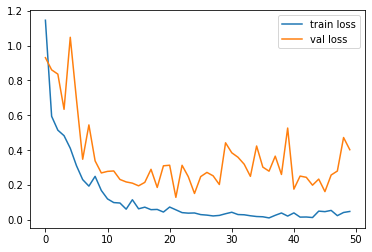

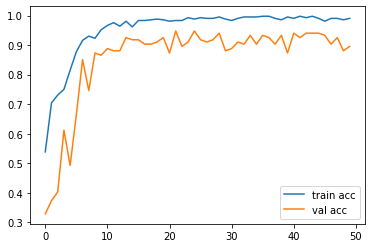

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
 #save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model.h5')

In [13]:
y_pred = model.predict(test_set)

5/5 [==============================] - 3s 416ms/step


In [14]:
y_pred

array([[5.00997126e-01, 4.99002844e-01],
       [1.33969588e-02, 9.86603081e-01],
       [9.98919427e-01, 1.08059112e-03],
       [1.05969794e-03, 9.98940289e-01],
       [2.41932855e-03, 9.97580647e-01],
       [1.04852505e-02, 9.89514649e-01],
       [9.99913275e-01, 8.66928822e-05],
       [6.13506883e-02, 9.38649237e-01],
       [4.40321296e-01, 5.59678733e-01],
       [2.42953897e-02, 9.75704551e-01],
       [9.99999940e-01, 3.05101222e-10],
       [9.81273472e-01, 1.87264327e-02],
       [9.99897301e-01, 1.02658494e-04],
       [3.83834617e-04, 9.99616206e-01],
       [9.94595051e-01, 5.40487934e-03],
       [9.99999940e-01, 8.97311874e-14],
       [5.69746224e-03, 9.94302511e-01],
       [9.99863386e-01, 1.36646209e-04],
       [9.95033145e-01, 4.96682897e-03],
       [9.44921672e-01, 5.50783798e-02],
       [9.99953330e-01, 4.66031888e-05],
       [9.99952257e-01, 4.77119429e-05],
       [1.58327492e-03, 9.98416662e-01],
       [9.99545395e-01, 4.54599678e-04],
       [9.983586

In [15]:
y_pred = np.argmax(y_pred, axis=1)

In [16]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0])

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('model.h5')

In [20]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png',target_size=(224,224))

In [21]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [22]:
x.shape

(224, 224, 3)

In [23]:
x=x/255

In [24]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [25]:
model.predict(img_data)

1/1 [==============================] - 0s 163ms/step


array([[0., 1.]], dtype=float32)

In [26]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 57ms/step


In [27]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
